# 🔴 **Task 20: Feature Engineering**
    Submitted by: Malaika Ahmed
Feature engineering is the process of using domain knowledge to select, modify, or create new features (variables) that make machine learning algorithms work better. It is one of the most critical steps in building effective machine-learning models because it directly influences the model's ability to learn and make accurate predictions.




## Key steps in feature engineering include:

1. Feature Selection: Identifying the most relevant features that contribute to the model's accuracy.
2. Feature Transformation: Applying mathematical transformations to features to improve the model's performance.
3. Feature Creation: Creating new features from existing data to provide more information to the model.


# **Task 1: Feature Selection**


In [1]:
# IMPORTING LIBRARIES

In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [96]:
pd.read_csv("titanic.csv")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## DATA PRE-PROCESSING

In [179]:
df.shape

(848, 15)

In [99]:
df=pd.read_csv("titanic.csv")

In [122]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
358,1,3,female,28.0,0,0,7.8792,Q,Third,woman,False,E,Queenstown,yes,True
288,1,2,male,42.0,0,0,13.0000,S,Second,man,True,A,Southampton,yes,True
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,B,Southampton,no,True


In [123]:
df.isnull().sum().sum()

0

In [156]:
df.duplicated().sum()

0

##  Correlation between numerical features and the target variable


In [138]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


In [295]:
numeric_df

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [139]:
corr_matrix=numeric_df.corr()

In [140]:
corr_matrix

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [157]:
# I HAVE SELECTED 'SURVIVED' AS TARGET VARIABLE

In [158]:
corr_matrix['survived']

survived    1.000000
pclass     -0.338481
age        -0.064910
sibsp      -0.035322
parch       0.081629
fare        0.257307
Name: survived, dtype: float64

## INSIGHTS:

The correlation coefficient between fare and target variable survived is 0.257307. This strong positive correlation tells that passengers who paid higher fares were more likely to survive, indicating that passengers in higher classes have better survival rate compared to passengers in lower classes.

##  Correlation between categorical features and the target variable- chi2 test


In [226]:
# Selecting categorical columns 

cat_df = df.select_dtypes(include=['object', 'category'])


In [227]:
cat_df=cat_df[['sex','embarked','class','who','deck','embark_town']]	

In [228]:
cat_df

,sex,embarked,class,who,deck,embark_town
0,male,S,Third,man,C,Southampton
1,female,C,First,woman,C,Cherbourg
2,female,S,Third,woman,C,Southampton
3,female,S,First,woman,C,Southampton
4,male,S,Third,man,C,Southampton
...,...,...,...,...,...,...
886,male,S,Second,man,C,Southampton
887,female,S,First,woman,B,Southampton
888,female,S,Third,woman,B,Southampton
889,male,C,First,man,C,Cherbourg


In [229]:
# Encode categorical features to numeric values

cat_df= cat_df.apply(LabelEncoder().fit_transform)

In [230]:
x = cat_df

In [231]:
# selecting the target variable survived

y = df['alive']

In [232]:
# Calculating chi-squared 

chi2_scores, p_values = chi2(x, y)

In [233]:
# Creating a DataFrame to show the chi-squared scores and p-values

chi2_df = pd.DataFrame({'Feature': x.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values})
chi2_df = chi2_df.sort_values(by='Chi2 Score', ascending=False)

In [234]:
chi2_df

,Feature,Chi2 Score,p-value
0,sex,86.645358,1.298350e-20
2,class,52.296522,4.772190e-13
3,who,24.942863,5.905473e-07
1,embarked,9.452523,2.108588e-03
5,embark_town,9.452523,2.108588e-03
4,deck,0.016173,8.988033e-01


In [235]:
np.round(chi2_df)

,Feature,Chi2 Score,p-value
0,sex,87.0,0.0
2,class,52.0,0.0
3,who,25.0,0.0
1,embarked,9.0,0.0
5,embark_town,9.0,0.0
4,deck,0.0,1.0


## Documenting the selected features based on the result of chi-square and p value


### CATEGORICAL FEATURES
- Deck has lowerst chi2 score,and highest p values,therefore it carries least correlation with target variable 'survived'.
- Aside by 'Deck',other categorical features have significant impact on target varialbe.
- Therefore excluding feature 'deck' only.

### Numerical Features
- None of numerical feature seems to have insignificant impact on target variable 'Survived'
- Therefore keeping all of the 5 input features

# **Task 2: Feature Transformation**

Feature scaling or feature transfomration is essential when input columns vary from a wide range such as age and salary. Common techniques include 
- Min-Max scaling (transforming data to a range of [0, 1])
- Standardization (centering data to have a mean of 0 and standard deviation of 1)
- Log Transformation (reducing skewness).

These transformations help improve model performance by ensuring all features contribute equally.f 1.lly.

In [238]:
df['fare'].max()

512.3292

In [239]:
df1['Age'].max()

80.0

In [240]:
## APPLYING TRANSFOMRATION ON THESE TWO COLUMNS SINCE THEY VARY A LOT IN RANGEES

In [241]:
## SELECTING INPUT FEATURES I.e AGE AND FARE AND TARGET VARIABLE SURVIVED

In [243]:
dfs=df[['age','fare','survived']]

In [244]:
# input features

x=dfs[['age','fare']]

In [254]:
x

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [245]:
# target variable 

y= dfs['survived']

In [255]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 848, dtype: int64

In [ ]:
## Before applying scaling splitting data into test and train data 

In [ ]:
## Train test split


In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) 

# test size=0.3 shows that 30% will testing data and 70% training data

In [256]:
x_train

,age,fare
748,19.0,53.1000
111,14.5,14.4542
449,52.0,30.5000
672,70.0,10.5000
569,32.0,7.8542
...,...,...
743,24.0,16.1000
733,23.0,13.0000
751,6.0,12.4750
533,28.0,22.3583


In [257]:
x_test

,age,fare
606,30.0,7.8958
562,28.0,13.5000
838,32.0,56.4958
783,28.0,23.4500
668,43.0,8.0500
...,...,...
166,28.0,55.0000
683,14.0,46.9000
791,16.0,26.0000
261,3.0,31.3875


In [258]:
y_train

748    0
111    0
449    1
672    0
569    1
      ..
743    0
733    0
751    1
533    1
171    0
Name: survived, Length: 593, dtype: int64

In [259]:
y_test

606    0
562    0
838    1
783    0
668    0
      ..
166    1
683    0
791    0
261    1
423    0
Name: survived, Length: 255, dtype: int64

In [249]:
# creating an object of standardscaler

scaler = StandardScaler()

In [250]:
# fit the scaler to the train set, it will learn the parameters
# fit implies that it will learn and store mean and std of both input columns age and fare

scaler.fit(x_train)


StandardScaler()

In [251]:
# transform train and test sets

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [252]:
x_train_scaled

array([[-0.8009542 ,  0.45682914],
       [-1.14857497, -0.35865817],
       [ 1.74826475, -0.02006649],
       ...,
       [-1.80519197, -0.40042241],
       [-0.10571267, -0.1918692 ],
       [-1.95969009, -0.04908116]])

In [253]:
x_test_scaled

array([[ 4.87854514e-02, -4.97050753e-01],
       [-1.05712667e-01, -3.78793297e-01],
       [ 2.03283570e-01,  5.28485875e-01],
       [-1.05712667e-01, -1.68832609e-01],
       [ 1.05302322e+00, -4.93796890e-01],
       [-3.37459845e-01, -5.10678151e-01],
       [-8.78203259e-01, -2.37148963e-01],
       [-6.46456081e-01, -4.56341591e-01],
       [ 5.12279806e-01, -4.97050753e-01],
       [-1.05712667e-01, -1.26277059e-01],
       [ 5.12279806e-01,  1.83036183e-01],
       [ 8.98525102e-01, -2.52183836e-01],
       [-5.69207022e-01,  2.53427937e+00],
       [-1.05712667e-01,  8.03950077e-01],
       [-1.05712667e-01, -5.00654902e-01],
       [ 2.21175911e+00,  1.72661652e+00],
       [-3.37459845e-01, -1.15023588e-01],
       [-8.00954200e-01, -4.42098027e-01],
       [-1.05712667e-01, -3.69477541e-02],
       [-1.18719950e+00,  1.73804243e-01],
       [ 1.20752134e+00, -1.03417721e-01],
       [-1.72794291e+00, -1.09748194e-01],
       [ 4.35030747e-01,  1.23547732e+00],
       [-1.

In [261]:
# x train and test scale is numpy array transforming it into DATAFRAME

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [262]:
x_train_scaled

,age,fare
0,-0.800954,0.456829
1,-1.148575,-0.358658
2,1.748265,-0.020066
3,3.138748,-0.442098
4,0.203284,-0.497929
...,...,...
588,-0.414709,-0.323929
589,-0.491958,-0.389344
590,-1.805192,-0.400422
591,-0.105713,-0.191869


In [263]:
x_test_scaled

,age,fare
0,0.048785,-0.497051
1,-0.105713,-0.378793
2,0.203284,0.528486
3,-0.105713,-0.168833
4,1.053023,-0.493797
...,...,...
250,-0.105713,0.496922
251,-1.187199,0.325999
252,-1.032701,-0.115024
253,-2.036939,-0.001339


In [265]:
np.round(x_train_scaled)

,age,fare
0,-1.0,0.0
1,-1.0,-0.0
2,2.0,-0.0
3,3.0,-0.0
4,0.0,-0.0
...,...,...
588,-0.0,-0.0
589,-0.0,-0.0
590,-2.0,-0.0
591,-0.0,-0.0


In [269]:
np.round(x_train_scaled.describe())

,age,fare
count,593.0,593.0
mean,0.0,-0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-1.0,-0.0
50%,-0.0,-0.0
75%,0.0,-0.0
max,3.0,10.0


#### RESUTL OF SCALING: MEAN OF TRAINING DATA HAS BEEN CENTRED TO 0 AND STD TO 1

In [268]:
np.round(x_test_scaled.describe())

,age,fare
count,255.0,255.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-1.0,-0.0
50%,-0.0,-0.0
75%,1.0,0.0
max,4.0,10.0


#### RESUTL OF SCALING: MEAN OF TEST DATA HAS BEEN CENTRED TO 0 AND STD TO 1

# Effect of Scaling


Text(0.5, 1.0, 'AFTER SCALING')

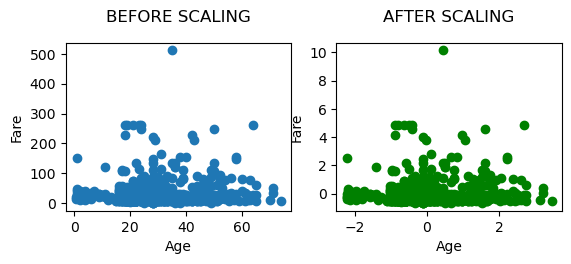

In [271]:
plt.subplot(2,2,1)
plt.scatter(x_train['age'],x_train['fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("BEFORE SCALING",pad=15)


plt.subplot(2,2,2)
plt.scatter(x_train_scaled['age'],x_train_scaled['fare'],color='g')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("AFTER SCALING",pad=15)

### INSIGHTS:
SCATTER PLOTS VERIFIES TOO THAT MEAN OF THE DATA IS CENTRED AROUND 0.

# **Task 3: Feature Creation**


In [273]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
416,1,2,female,34.0,1,1,32.5000,S,Second,woman,False,C,Southampton,yes,False
455,1,3,male,29.0,0,0,7.8958,C,Third,man,True,C,Cherbourg,yes,True
307,1,1,female,17.0,1,0,108.9000,C,First,woman,False,C,Cherbourg,yes,False


In [275]:
x = df[['age','pclass','sibsp','parch']]
y = df['survived']

### Constructing a new col named Family size from sibsp(sibling spouse) and parch(parent child)


In [281]:

x['Family_size'] = x['sibsp'] + x['parch'] + 1
# +1 shows that i'm counting that passenger into family count

C:\Users\Malaika ahmad\AppData\Local\Temp\ipykernel_7628\1471904793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Family_size'] = x['sibsp'] + x['parch'] + 1


In [282]:
x.head()

,age,pclass,sibsp,parch,Family_size
0,22.0,3,1,0,2
1,38.0,1,1,0,2
2,26.0,3,0,0,1
3,35.0,1,1,0,2
4,35.0,3,0,0,1


In [ ]:
## CALCULATING THE ACCURACY BEFORE AND AFTER CRREATING A NEW COLUMN

In [279]:
np.mean(cross_val_score(LogisticRegression(),x,y,scoring='accuracy',cv=20))


0.6914728682170542

In [283]:
np.mean(cross_val_score(LogisticRegression(),x,y,scoring='accuracy',cv=20))


0.6914728682170542

# **Task 4: Polynomial Features**
Extracting polynomial features is a feature engineering technique that involves creating new features by raising existing features to various powers. This process allows machine learning models to capture non-linear relationships between variables.

In [332]:
poly = PolynomialFeatures(degree=2)  

In [341]:
# TAKING TWO VARIALBS FARE AND AGE TO SHOW THE NON-LINEAR BEHAVIOUR

Text(0, 0.5, 'Fare')

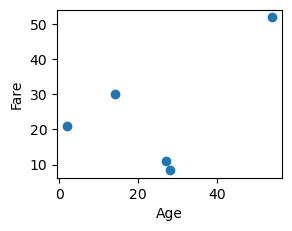

In [343]:
plt.subplot(2,2,1)

x1=df['age']
x2=x1[5:10]

y1=df['fare']
y2=y1[5:10]

plt.scatter(x2,y2)
plt.xlabel("Age")
plt.ylabel("Fare")


In [334]:
x = df[['age', 'fare']]


In [335]:
x_poly = poly.fit_transform(x)


In [336]:
x_poly

array([[1.00000000e+00, 2.20000000e+01, 7.25000000e+00, 4.84000000e+02,
        1.59500000e+02, 5.25625000e+01],
       [1.00000000e+00, 3.80000000e+01, 7.12833000e+01, 1.44400000e+03,
        2.70876540e+03, 5.08130886e+03],
       [1.00000000e+00, 2.60000000e+01, 7.92500000e+00, 6.76000000e+02,
        2.06050000e+02, 6.28056250e+01],
       ...,
       [1.00000000e+00, 2.80000000e+01, 2.34500000e+01, 7.84000000e+02,
        6.56600000e+02, 5.49902500e+02],
       [1.00000000e+00, 2.60000000e+01, 3.00000000e+01, 6.76000000e+02,
        7.80000000e+02, 9.00000000e+02],
       [1.00000000e+00, 3.20000000e+01, 7.75000000e+00, 1.02400000e+03,
        2.48000000e+02, 6.00625000e+01]])

In [337]:
# Convert to DataFrame for visualization

poly_features_df = pd.DataFrame(x_poly, columns=poly.get_feature_names_out())


In [338]:
dfp=poly_features_df

In [339]:
dfp

,1,age,fare,age^2,age fare,fare^2
0,1.0,22.0,7.2500,484.0,159.5000,52.562500
1,1.0,38.0,71.2833,1444.0,2708.7654,5081.308859
2,1.0,26.0,7.9250,676.0,206.0500,62.805625
3,1.0,35.0,53.1000,1225.0,1858.5000,2819.610000
4,1.0,35.0,8.0500,1225.0,281.7500,64.802500
...,...,...,...,...,...,...
843,1.0,27.0,13.0000,729.0,351.0000,169.000000
844,1.0,19.0,30.0000,361.0,570.0000,900.000000
845,1.0,28.0,23.4500,784.0,656.6000,549.902500
846,1.0,26.0,30.0000,676.0,780.0000,900.000000


Text(0, 0.5, 'Fare')

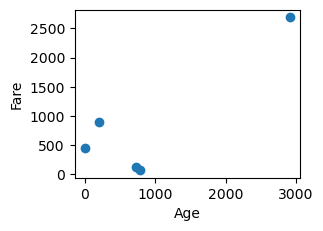

In [344]:
plt.subplot(2,2,1)

x1=dfp['age^2']
x2=x1[5:10]

y1=dfp['fare^2']
y2=y1[5:10]

plt.scatter(x2,y2)
plt.xlabel("Age")
plt.ylabel("Fare")


In [ ]:
# AFTER APPLYING POLYNOMIAL FEATURES,GRAPH SHOWS THE NON-LINEAR BEHAVIOR WITH MORE CLARITY

# **Task 5: Handling Categorical Features**


In [346]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
780,1,3,female,13.0,0,0,7.2292,C,Third,child,False,B,Cherbourg,yes,True
654,0,3,female,18.0,0,0,6.7500,Q,Third,woman,False,A,Queenstown,no,True
528,0,3,male,39.0,0,0,7.9250,S,Third,man,True,C,Southampton,no,True


## APPLYING OrdinalEncoding to ordinal features

In [350]:
# SELECTING ORDINAL FEATURES 'CLASS' AND 'WHO'
x=df[['class','who']]

In [351]:
# SELECTING TARGET VARIABLE 'ALIVE'

In [352]:
y=df['alive']

## Splitting the data into train and  test 

In [388]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [389]:
df['class'].value_counts()

class
Third     455
First     212
Second    181
Name: count, dtype: int64

In [390]:
df['who'].value_counts()

who
man      500
woman    265
child     83
Name: count, dtype: int64

In [391]:
oe = OrdinalEncoder(categories=[['First','Second','Third'],['man','woman','child']])


In [392]:
# FITTING THE TRAINING AND TEST DATA x_train=oe.transform(x_train)

In [394]:
oe.fit(x_train)


OrdinalEncoder(categories=[['First', 'Second', 'Third'],
                           ['man', 'woman', 'child']])

In [395]:
oe.fit(x_test)

OrdinalEncoder(categories=[['First', 'Second', 'Third'],
                           ['man', 'woman', 'child']])

In [396]:
# TRAINING THE TEST ND TRAIN DATA

In [397]:
 x_train=oe.transform(x_train)

In [398]:
 x_test=oe.transform(x_test)

In [399]:
 x_train

array([[2., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [2., 0.],
       [2., 1.]])

In [400]:
x_test

array([[2., 0.],
       [1., 2.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [2., 2.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [2., 0.],
       [1., 0.],
       [1., 2.],
       [2., 2.],
       [2., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [2., 2.],
       [2., 0.],
       [2., 0.],
       [2., 0.],
       [1., 1.],
       [0., 1.],
       [2., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [0., 0.],
       [0., 1.],
       [2., 0.],
       [2., 1.],
       [0., 0.],
       [2., 1.],
       [0., 0.],
       [0., 1.],
       [0., 2.],
       [2., 0.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [0., 0.],
       [0., 1.],
       [2., 0.],
       [2., 0.],
       [2., 0.],
       [1., 1.],
       [2., 0.],
       [1., 2.],
       [2., 1.],
       [1., 1.],
       [2., 2.

In [401]:
oe.categories_

[array(['First', 'Second', 'Third'], dtype=object),
 array(['man', 'woman', 'child'], dtype=object)]

In [420]:
transformed_col = oe.fit_transform(df[['class', 'who']])

In [421]:
transformed_df = pd.DataFrame(transformed_col, columns=['class', 'who'])

In [415]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [419]:
print("Categorical columns into numerical columns \n \n CLASS: 0=FIRST,1=SECOND,2=THIRD \n WHO: 0=MAN, 1=WOMAN, 2=CHILD \n \n" ,transformed_df)

Categorical columns into numerical columns 
 
 CLASS: 0=FIRST,1=SECOND,2=THIRD 
 WHO: 0=MAN, 1=WOMAN, 2=CHILD 
 
      class  who
0      2.0  0.0
1      0.0  1.0
2      2.0  1.0
3      0.0  1.0
4      2.0  0.0
..     ...  ...
843    1.0  0.0
844    0.0  1.0
845    2.0  1.0
846    0.0  0.0
847    2.0  0.0

[848 rows x 2 columns]


In [ ]:
## USING LabeEncoding to transform target column 'alive'

In [404]:
le = LabelEncoder()


In [405]:
le.fit(y_train)


LabelEncoder()

In [406]:
le.classes_


array(['no', 'yes'], dtype=object)

In [407]:
y_train = le.transform(y_train)


In [408]:
y_test = le.transform(y_test)


In [409]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,

In [422]:
y_trans=pd.DataFrame(y_train,columns=['alive'])

In [423]:
print("Categorical column into numerical column \n \n ALIVE: 0=NO, 1=YES \n \n" ,y_trans)

Categorical column into numerical column 
 
 ALIVE: 0=NO, 1=YES 
 
      alive
0        0
1        0
2        1
3        0
4        0
..     ...
673      0
674      0
675      0
676      0
677      1

[678 rows x 1 columns]


In [410]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])